<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/convex-optimization/blob/main/poison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 44 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.1


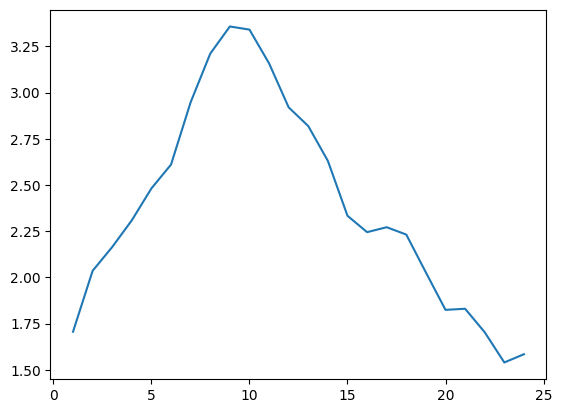

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 45 times so far.

  warnings.warn(msg, UserWarning)


1


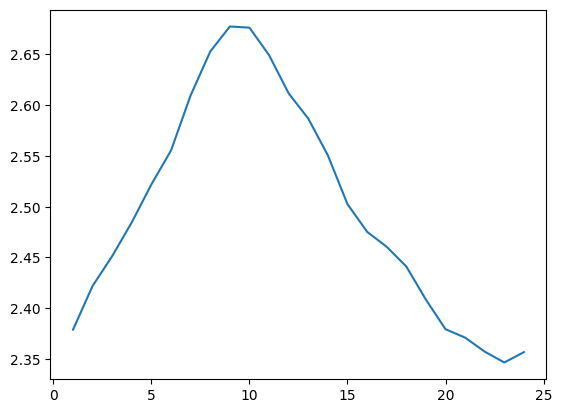

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 46 times so far.

  warnings.warn(msg, UserWarning)


10


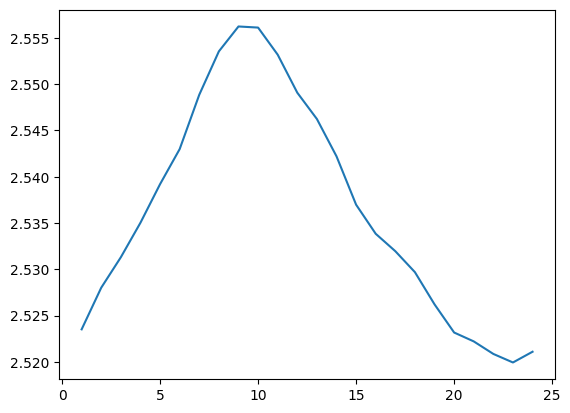

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 47 times so far.

  warnings.warn(msg, UserWarning)


100


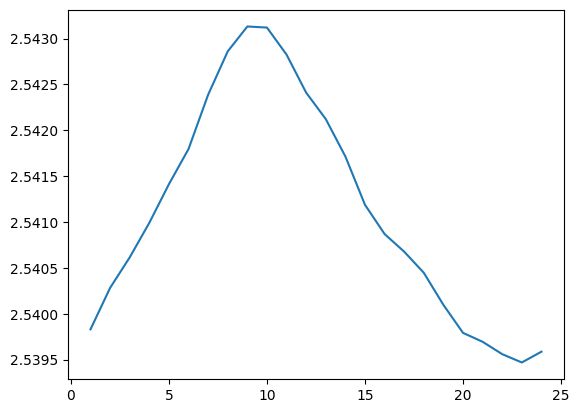

In [10]:
N = np.array([0, 4, 2, 2, 3, 0, 4, 5, 6, 6, 4, 1, 4, 4, 0, 1, 3, 4, 2, 0, 3, 2, 0, 1])
for rho in (0.1,1,10,100):
    T = len(N)
    lambdas = cp.Variable(T)

    likelihood_term = cp.sum(N * cp.log(lambdas) - lambdas - cp.log(factorial(N)))

    regularization_term = rho * cp.sum_squares(lambdas[1:] - lambdas[:-1]) + rho * cp.square(lambdas[0] - lambdas[-1])

    objective = cp.Maximize(likelihood_term - regularization_term)

    constraints = [lambdas >= 0]

    problem = cp.Problem(objective, constraints)

    problem.solve()
    lambda_values = lambdas.value/T
    hours = range(1, len(N)+1)
    print(rho)
    plt.plot(hours, lambda_values)
    plt.show()

In [4]:
N_test = np.array([0, 1, 3, 2, 3, 1, 4, 5, 3, 1, 4, 3, 5, 5, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0])

for rho in (0.1,1,10,100):
    T = len(N)
    lambdas = cp.Variable(T)

    likelihood_term = cp.sum(N * cp.log(lambdas) - lambdas - cp.log(factorial(N)))

    regularization_term = rho * cp.sum_squares(lambdas[1:] - lambdas[:-1]) + rho * cp.square(lambdas[0] - lambdas[-1])

    objective = cp.Maximize(likelihood_term - regularization_term)

    constraints = [lambdas >= 0]

    problem = cp.Problem(objective, constraints)

    problem.solve()
    lambda_values = lambdas.value/T
    value = cp.sum(N_test * cp.log(lambda_values) - lambda_values - cp.log(factorial(N_test))).value
    padding = " " * (3-len(str(rho)))
    print("ρ=",rho,"\t: ln(L) =", value)

ρ= 0.1 	: ln(L) = 1084.6263213840211
ρ= 1 	: ln(L) = 1054.1072421657555
ρ= 10 	: ln(L) = 1050.4507020359833
ρ= 100 	: ln(L) = 1050.1463725770254


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 14 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplic